# Week6 Lab

## Download & Extract Data

Programmatically download the zip file & extract

In [1]:
from zipfile import ZipFile
import pandas as pd

In [2]:
from urllib import request

def download_file(file_name, url):
    res = request.urlopen(url)
    with open(file_name,'wb') as file:
        file.write(res.read())

In [3]:
file_url = 'https://github.com/msaricaumbc/DS_data/blob/master/lab_data.zip?raw=true'
file_name = 'lab_data.zip'

download_file(file_name, file_url)

In [4]:
def unzip(file_name, path='./'):
    # opening the zip file in READ mode 
    with ZipFile(file_name, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 

        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall(path = path) 
        print('Done!') 

In [5]:
unzip(file_name)

File Name                                             Modified             Size
PoliceShootingsUS.csv                          2021-09-21 20:53:54       227653
__MACOSX/._PoliceShootingsUS.csv               2021-09-21 20:53:54          276
volunteers.txt                                 2021-10-06 00:32:28         7015
__MACOSX/._volunteers.txt                      2021-10-06 00:32:28          176
Extracting all the files now...
Done!


## Reading data from a csv file

For the file `PoliceShootingsUS.csv`, please answer the following questions:

* How many offenders are older than 55? 

In [6]:
## Your code is here
download_file('PoliceShootingsUS.csv','https://raw.githubusercontent.com/msaricaumbc/DS_data/master/PoliceShootingsUS.csv')

In [7]:
df = pd.read_csv('PoliceShootingsUS.csv',encoding = 'Windows-1252')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [8]:
a = df['age']
b = a[a>55].count()
b

235

* What's the age distribution?

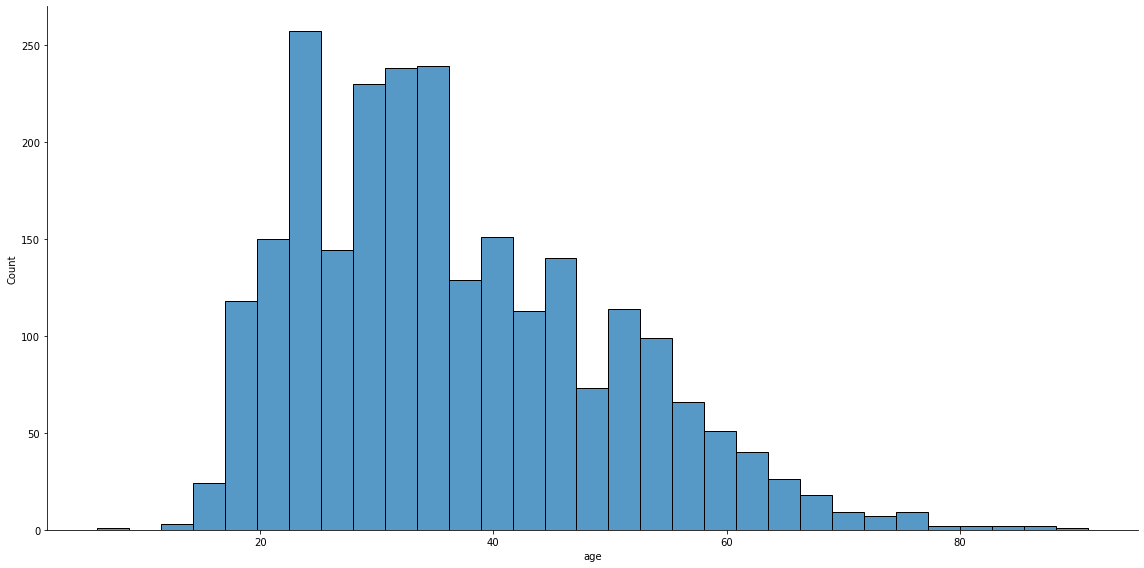

In [9]:
## Your code is here
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(data = df, x="age", kind = 'hist', height= 8, aspect= 2)

## Dirty data

Read `volunteers.txt` file and perform the following action:

* Create a dataframe with columns: Name, Lastname, State

In [10]:
## Your code is here
with open('volunteers.txt') as f_txt:
    lines = f_txt.read()
    print(lines)

"log"[Harding, Christine] (Virginia) - Universal human-resource flexibility
"log"[Davis, Kimberly] (New York) - Compatible demand-driven hub
"log"[Ingram, Rachel] (Louisiana) - Versatile multimedia website
"log"[Walker, Richard] (Oregon) - Networked eco-centric approach
"log"[Barnes, Francisco] (Virginia) - Persistent systematic moratorium
"log"[Perez, Rachel] (Alaska) - Optimized national portal
"log"[Choi, Linda] (Iowa) - Operative discrete Internet solution
"log"[Gomez, Janice] (Vermont) - Managed national attitude
"log"[Lloyd, Jesus] (Connecticut) - Adaptive systematic definition
"log"[Moore, Alicia] (Michigan) - Innovative motivating support
"log"[Murray, Pamela] (Arizona) - Diverse systematic policy
"log"[Moore, Brittney] (Washington) - Progressive web-enabled synergy
"log"[Jones, Alexander] (Arizona) - Advanced 24/7 data-warehouse
"log"[Morales, David] (Florida) - Streamlined eco-centric conglomeration
"log"[Hogan, Elizabeth] (Rhode Island) - Re-engineered demand-driven groupwar

In [14]:
import csv
with open('volunteers.txt','r') as f_txt:
    lines = f_txt.readlines()
    with open('volunteers.csv','w') as f_csv:
        for line in lines:
            line = line.replace("(",',')
            line = line.split(',')
            first_name = line[0]
            first_name = first_name.split('[')[1]
            last_name = line[1]
            last_name = last_name.split(']')[0]
            last_name = last_name.replace(' ', '')
            state = line[2]
            state = state.split(')')[0]
            print(first_name)
            print(last_name)
            print(state)
            fieldnames = ['first_name', 'last_name','state']
            writer = csv.DictWriter(f_csv, fieldnames = fieldnames)
            df = pd.DataFrame()

Harding
Christine
Virginia
Davis
Kimberly
New York
Ingram
Rachel
Louisiana
Walker
Richard
Oregon
Barnes
Francisco
Virginia
Perez
Rachel
Alaska
Choi
Linda
Iowa
Gomez
Janice
Vermont
Lloyd
Jesus
Connecticut
Moore
Alicia
Michigan
Murray
Pamela
Arizona
Moore
Brittney
Washington
Jones
Alexander
Arizona
Morales
David
Florida
Hogan
Elizabeth
Rhode Island
Floyd
Courtney
Pennsylvania
Scott
Mark
West Virginia
Johnson
Philip
North Carolina
Taylor
Michael
New Hampshire
Freeman
Barbara
Pennsylvania
Humphrey
Shawn
Oklahoma
Schultz
Ernest
South Carolina
Harper
Alexander
Mississippi
Shaw
Kendra
Nebraska
Glenn
Samantha
Louisiana
Jackson
Kara
Wyoming
Rivera
Vickie
North Carolina
Robinson
Matthew
Iowa
Taylor
Nicole
Kansas
Harper
Eric
South Dakota
Smith
Karen
Oklahoma
Chavez
Donald
Nebraska
Thompson
Sarah
Ohio
Gibson
Veronica
Vermont
Taylor
Steven
Montana
Mitchell
Alexandra
North Carolina
Simmons
Nicole
Texas
Ramirez
Riley
South Dakota
Lopez
Kenneth
Colorado
Rose
Jeffery
Kentucky
Brown
Nichole
Wisconsin
Zi